In [1]:
from __future__ import print_function
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
pd.pandas.set_option('display.max_columns', None)
#pip install --upgrade gensim
import json
import operator
import collections
import re
import numpy as np
import pandas as pd
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction import text
nltk.download('averaged_perceptron_tagger')

unable to import 'smart_open.gcs', disabling that module
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/oommenkuruvilla/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
training_dataframe = pd.read_csv('vectors_train.csv') 
y = training_dataframe['cuisine']
training_dataframe.columns
dfs = training_dataframe.drop(columns =['cuisine'])
dfs.isnull().values.any()
dfs = dfs.dropna()
dfs.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=300)

In [3]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dfs)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 33806 samples in 0.865s...
[t-SNE] Computed neighbors for 33806 samples in 369.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33806
[t-SNE] Computed conditional probabilities for sample 2000 / 33806
[t-SNE] Computed conditional probabilities for sample 3000 / 33806
[t-SNE] Computed conditional probabilities for sample 4000 / 33806
[t-SNE] Computed conditional probabilities for sample 5000 / 33806
[t-SNE] Computed conditional probabilities for sample 6000 / 33806
[t-SNE] Computed conditional probabilities for sample 7000 / 33806
[t-SNE] Computed conditional probabilities for sample 8000 / 33806
[t-SNE] Computed conditional probabilities for sample 9000 / 33806
[t-SNE] Computed conditional probabilities for sample 10000 / 33806
[t-SNE] Computed conditional probabilities for sample 11000 / 33806
[t-SNE] Computed conditional probabilities for sample 12000 / 33806
[t-SNE] Computed conditional probabilities for 

In [4]:
dfs['2d-one'] = tsne_results[:,0]
dfs['2d-two'] = tsne_results[:,1]
uniques = y.unique()
k = []
for i,u in enumerate(uniques):
    k.append(training_dataframe.loc[training_dataframe['cuisine'] == u].index.tolist())

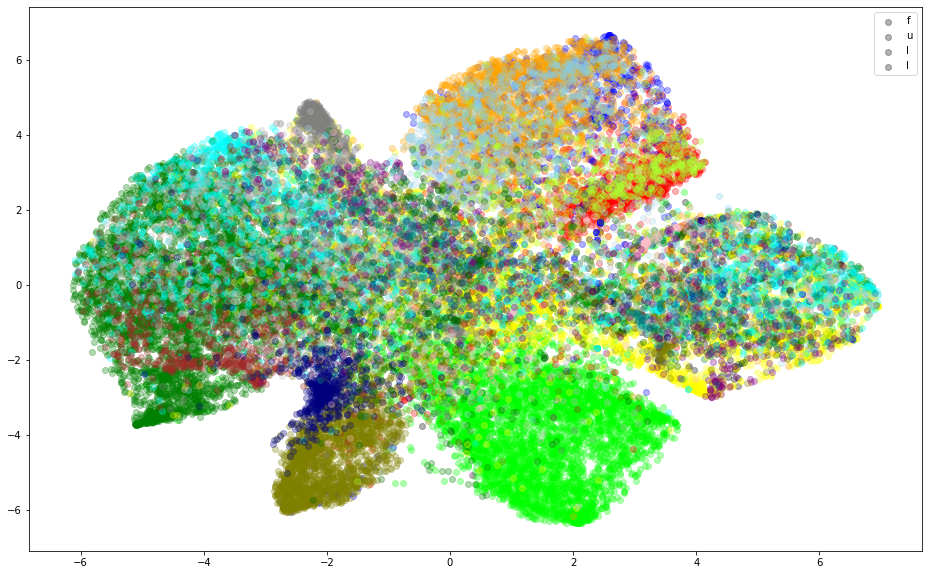

In [5]:
plt.figure(figsize=(16,10))
colours = ["black","lime","green","yellow","red","blue","orange","olive","grey","cyan","brown","lightblue","greenyellow","skyblue","silver","navy","darkgreen","pink","purple","teal"]
count = 0
for i in k: 
    for j in i:
        plt.scatter(dfs['2d-one'][j],dfs['2d-two'][j], c=colours[count], alpha=0.3)
    count = count + 1
plt.legend("full")        
plt.show()